In [60]:
import pandas as pd
import numpy as np
from shapely import wkt
from pyproj import CRS
import geopandas as gpd
from scipy.spatial import cKDTree
import sqlite3
from datetime import date
from shapely.geometry import shape
import os
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 

ruta_excel = r"Datos\Casos\Casos Direccion Correcta.xlsx"
df0 = pd.read_excel(ruta_excel)

# df_casos=df0.drop(["DIRECCION"],axis=1)
df0.head()

df0=df0.loc[~((df0["DIRECCION"].isnull())&(~df0["WKT"].isnull()))]
df00=df0[["DIRECCION","lon","lat","WKT"]].drop_duplicates()
df00.head()

,DIRECCION,lon,lat,WKT
0,"AV. UNIVERSIDAD 769, Villa María, Córdoba",-63.212891,-32.408501,POINT(-63.2128909 -32.4085015)
1,"PRIMERA JUNTA 1767, Villa María, Córdoba",-63.250747,-32.419569,POINT(-63.2507468 -32.4195686)
2,"Libertad -292, Villa María, Córdoba",-63.214391,-32.428033,POINT(-63.2143908 -32.4280325)
3,"MALVINAS ARGENTINAS 2693, Villa María, Córdoba",-63.239472,-32.413703,POINT(-63.2394721 -32.4137035)
4,"MERCEDARIOS ESQ. LACAR 00, Villa María, Córdoba",-63.271970,-32.406956,POINT(-63.2719697 -32.4069556)


In [61]:
df00["lon"].max(),df00["lon"].min(),df00["lat"].max(),df00["lat"].min()

(np.float64(-63.1876424),
 np.float64(-64.5043288),
 np.float64(-29.9032955),
 np.float64(-32.4403311))

In [62]:
df00

,DIRECCION,lon,lat,WKT
0,"AV. UNIVERSIDAD 769, Villa María, Córdoba",-63.212891,-32.408501,POINT(-63.2128909 -32.4085015)
1,"PRIMERA JUNTA 1767, Villa María, Córdoba",-63.250747,-32.419569,POINT(-63.2507468 -32.4195686)
2,"Libertad -292, Villa María, Córdoba",-63.214391,-32.428033,POINT(-63.2143908 -32.4280325)
3,"MALVINAS ARGENTINAS 2693, Villa María, Córdoba",-63.239472,-32.413703,POINT(-63.2394721 -32.4137035)
4,"MERCEDARIOS ESQ. LACAR 00, Villa María, Córdoba",-63.271970,-32.406956,POINT(-63.2719697 -32.4069556)
...,...,...,...,...
3928,"PROL. ALVEAR Y COSTA RICA 0, Villa María, Córdoba",-63.204489,-32.429210,POINT(-63.2044892 -32.42921)
3929,"MANUEL OCAMPO 774, Villa María, Córdoba",-63.239748,-32.420813,POINT(-63.2397475 -32.4208131)
3931,"JUJUY 2784, Villa María, Córdoba",-63.230470,-32.393979,POINT(-63.23047 -32.3939791)
3932,"ITUZAINGO 554, Villa María, Córdoba",-63.229502,-32.410413,POINT(-63.2295019 -32.4104126)


In [63]:

ruta_excel = r"Datos\Casos\No utiles\notificaciones dengue Villa María 23-24.xlsx"

df_0 = pd.read_excel(ruta_excel)

ruta_excel = r"Datos\Casos\No utiles\Notificaciones dengue Villa María 24-25.xlsx"

df_1 = pd.read_excel(ruta_excel)

df_f=pd.concat([df_0,df_1])
df_f["DIRECCION"]=df_f["calle_domicilio"]+" "+df_f["numero_domicilio"]+", Villa María, Córdoba"

df_f.head()

C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1293434278.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_f["DIRECCION"]=df_f["calle_domicilio"]+" "+df_f["numero_domicilio"]+", Villa María, Córdoba"


,codigo_ciudadano,ideventocaso,evento,sexo,fecha_nacimiento,edad_actual,edad_diagnostico,grupo_etario,sepi_apertura,sepi_sintoma,sepi_consulta,sepi_muestra,pais_residencia,provincia_residencia,departamento_residencia,localidad_residencia,calle_domicilio,numero_domicilio,clasificacion_manual,clasificacion_automatica,fecha_apertura,provincia_intervienen,region_sanitaria_intervienen,departamento_intervienen,localidad_intervienen,establecimientos_intervienen,fecha_consulta,prov_clinica,depto_clinica,loca_clinica,estab_clinica,sintomatico,fis,embarazada,internado,curado,fecha_internacion,cuidado_intensivo,fecha_cui_intensivos,fecha_alta_medica,fallecido,fecha_fallecimiento,muestra,ftm,establecimiento_muestra,provincia_muestra,departamento_muestra,localidad_muestra,fecha_estudio,determinacion,tecnica,resultado,fecha_recepcion,establecimiento_diag,provincia_diag,departamento_diag,localidad_diag,fecha_inicio_viaje,fecha_fin_viaje,pais_viaje,prov_viaje,loc_viaje,antecedente_epidemiologico,id_snvs_vacuna,vacuna,dosis,fecha_aplicacion,fecha_inicio_sintoma,signo_sintoma,estab_tto,tratamiento_2,fecha_inicio_trat,fecha_fin_trat,resultado_tratamiento,grupo_evento,establecimiento_epi,provincia_epi,departamento_epi,localidad_epi,id_establecimiento_carga,establecimiento_carga,provincia_carga,departamento_carga,localidad_carga,user_centinela,evento_centinela,user_cent_participo,tipo_lugar_ocurrencia,nombre_lugar_ocurrencia,localidad_ambito_ocurrencia,sitio_probable_adquisicion,sitio_probable_diseminacion,frecuencia,fecha_ambito_ocurrencia,fecha_antecedente_epi,investigacion_terreno,fecha_investigacion,tipo_y_lugar_investigacion,contacto_con_confir,contacto_con_sospechoso,contactos_relevados_contactos_de,contactos_menores_1,contacto_embarazadas,contactos_vacunados,observaciones,comorbilidad,diag_referido,fecha_diag_referido,region_sanitaria_muestra,region_sanitaria_clinica,region_sanitaria_carga,anio_epi_apertura,anio_epi_sintoma,anio_epi_consulta,anio_epi_muestra,establecimiento_internacion,ocupacion,validacion,info_contacto,clasificacion_algoritmo,edad_apertura,cobertura_social,valor,origen_financiamiento,etnia,genero,sexo_al_nacer,fecha_papel,barrio_popular,edateap,edatefis,edateconsul,edateftm,edatefpapel,edate_curva,semana_curva,clasificacion_resumen,notif_postvacuna,dup,idpaisresidencia,id_prov_indec_residencia,id_depto_indec_residencia,id_loc_indec_residencia,id_prov_indec_clinica,id_depto_indec_clinica,id_loc_indec_clinica,id_estab_clinica,id_snvs_evento_muestra,id_establecimiento_muestra,id_prov_indec_muestra,id_depto_indec_muestra,id_loc_indec_muestra,id_snvs_prueba_muestra,id_establecimiento_diag,id_prov_indec_diag,id_depto_indec_diag,id_loc_indec_diag,id_snvs_viaje_epidemio,id_pais_viaje,id_prov_indec_viaje,id_loc_indec_viaje,id_snvs_antecedente_epidemio,id_snvs_signo_sintoma,id_origen,id_prov_indec_epi,id_depto_indec_epi,id_loc_indec_epi,id_prov_indec_carga,id_depto_indec_carga,id_loc_indec_carga,id_snvs_evento,id_user_registro,id_user_cent_participo,id_provincia_residencia,id_provincia_clinica,id_provincia_muestra,id_provincia_viaje,id_provincia_carga,se_declara_pueblo_indigena,id_snvs_interpret_usr,id_snvs_muestra,id_snvs_tipo_prueba,id_snvs_prueba,id_snvs_resultado,clasif_sitio_adq,asist_resp_mecanica,clasif_est_com,responsable,tipodoc_responsable,nrodoc_responsable,cp,DIRECCION
0,1215506060,37565637,Dengue,M,1951-11-19,73,72,Mayores de 65 años,16,13,13,,Argentina,Córdoba,General San Martín,VILLA MARIA,AV. UNIVERSIDAD,769,Caso confirmado por nexo epidemiológico autóctono,No disponible,2024-04-15,"6, 6,","36,","197, 197,","14042170, 14042170,","14230,",2024-03-24,Córdoba,General San Martín,VILLA MARIA,CLINICA PRIVADA DE ESPECIALIDADES VILLA MARIA ...,SI,2024-03-24,NaN,NO,NaN,NaN,NaN,NaN,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sindrome Febril Agudo Inespecífico (SFAI),NaN,NaN,NaN,NaN,14230,CLINICA PRIVADA DE ESPECIALIDADES VILLA MARIA 

In [64]:

# 1. Asegúrate de tener tu DataFrame cargado como df_f
#    y que tiene las columnas 'fis' y 'fecha_apertura'

df_f['fis'] = pd.to_datetime(df_f['fis'], dayfirst=True, errors='coerce')
df_f['fecha_apertura'] = pd.to_datetime(df_f['fecha_apertura'], dayfirst=True, errors='coerce')

# 2. Calcula la diferencia en días
df_f['diff_apertura_fis'] = (df_f['fecha_apertura'] - df_f['fis']).dt.days
df_f['diff_apertura_fis']=df_f['diff_apertura_fis'].fillna(-1)
df_f.loc[(df_f['diff_apertura_fis'].astype(int)<0)|(df_f['diff_apertura_fis'].astype(int)>10),'fis']=pd.NaT

df_f['fis'] = pd.to_datetime(df_f['fis'], dayfirst=True, errors='coerce')
df_f['fecha_apertura'] = pd.to_datetime(df_f['fecha_apertura'], dayfirst=True, errors='coerce')

# 3. Calcular diff original (en días) y guardar copia
df_f['diff_apertura_fis'] = (df_f['fecha_apertura'] - df_f['fis']).dt.days
diff_orig = df_f['diff_apertura_fis'].copy()

# 4. Estadísticas antes de la imputación
mean_orig = diff_orig.mean()
std_orig  = diff_orig.std()

print(f"Antes de imputar: media = {mean_orig:.2f} días, std = {std_orig:.2f} días")

# 5. Imputar los fis faltantes muestreando de la distribución empírica
diffs      = df_f.loc[df_f['fis'].notnull(), 'diff_apertura_fis']
mask_null  = df_f['fis'].isnull()
n_null     = mask_null.sum()

np.random.seed(42)
sampled   = diffs.sample(n=n_null, replace=True).values
df_f.loc[mask_null, 'fis'] = (
    df_f.loc[mask_null, 'fecha_apertura']
    - pd.to_timedelta(sampled, unit='d')
)

# 6. Recalcular diff después de la imputación
df_f['diff_apertura_fis'] = (df_f['fecha_apertura'] - df_f['fis']).dt.days
diff_new = df_f['diff_apertura_fis']

# 7. Estadísticas después de la imputación
mean_new = diff_new.mean()
std_new  = diff_new.std()

print(f"Después de imputar: media = {mean_new:.2f} días, std = {std_new:.2f} días")
print(f"Diferencia en media: {mean_new - mean_orig:+.2f} días")
print(f"Diferencia en std:   {std_new  - std_orig:+.2f} días")


Antes de imputar: media = 5.10 días, std = 2.35 días
Después de imputar: media = 5.13 días, std = 2.35 días
Diferencia en media: +0.03 días
Diferencia en std:   -0.01 días


C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\554492888.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_f['fis'] = pd.to_datetime(df_f['fis'], dayfirst=True, errors='coerce')
C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\554492888.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_f['fecha_apertura'] = pd.to_datetime(df_f['fecha_apertura'], dayfirst=True, errors='coerce')
C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\554492888.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_f['diff_apertura_fis'] = (df_f['fecha_apertura'] - d

In [65]:

# 3. Parámetros de incubación (sin ajuste por edad/sexo)
mu_base = 5.0   # días de incubación promedio
sigma   = 2.0   # desviación estándar

# 5. Muestreamos el periodo de incubación para cada fila
np.random.seed(42)
# Genera un array de incubaciones
incubaciones = np.random.normal(loc=mu_base, scale=sigma, size=len(df_f))
# Redondea y fuerza un mínimo de 3 días
incubaciones = np.round(incubaciones)
incubaciones = np.clip(incubaciones, 3, None)  # valores <3 pasan a 3

df_f['dias_incub'] = incubaciones.astype(int)

# 6. Calcula la fecha estimada de picadura
df_f['fecha_picadura_estimada'] = df_f['fis'] - pd.to_timedelta(df_f['dias_incub'], unit='D')

# 7. Recalcula diff_apertura_fis para ver stats tras la estimación
df_f['diff_apertura_fis'] = (df_f['fecha_apertura'] - df_f['fis']).dt.days
mean_new = df_f['diff_apertura_fis'].mean()
std_new  = df_f['diff_apertura_fis'].std()
print(f"Después de estimar picadura: media diff = {mean_new:.2f} d, std = {std_new:.2f} d")
print(f"Cambio en media = {mean_new - mean_orig:+.2f} d, cambio en std = {std_new - std_orig:+.2f} d")
df_f2=df_f[["DIRECCION","ideventocaso","sexo","edad_diagnostico","fecha_picadura_estimada","fecha_apertura"]]
aj=pd.merge(df_f2,df00,on=["DIRECCION"],how="left") # traigo la información 

aj.loc[~aj["WKT"].isnull()]

df_casos=aj.copy()
df_casos.head()

Después de estimar picadura: media diff = 5.13 d, std = 2.35 d
Cambio en media = +0.03 d, cambio en std = -0.01 d


C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1129041096.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_f['dias_incub'] = incubaciones.astype(int)
C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1129041096.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_f['fecha_picadura_estimada'] = df_f['fis'] - pd.to_timedelta(df_f['dias_incub'], unit='D')


,DIRECCION,ideventocaso,sexo,edad_diagnostico,fecha_picadura_estimada,fecha_apertura,lon,lat,WKT
0,"AV. UNIVERSIDAD 769, Villa María, Córdoba",37565637,M,72,2024-04-05,2024-04-15,-63.212891,-32.408501,POINT(-63.2128909 -32.4085015)
1,"PRIMERA JUNTA 1767, Villa María, Córdoba",37661764,M,72,2024-04-15,2024-04-24,-63.250747,-32.419569,POINT(-63.2507468 -32.4195686)
2,"Libertad -292, Villa María, Córdoba",37423312,M,72,2024-03-23,2024-04-04,-63.214391,-32.428033,POINT(-63.2143908 -32.4280325)
3,"BRANDSEN 647, Villa María, Córdoba",37084211,M,71,2024-02-16,2024-03-02,NaN,NaN,NaN
4,"MALVINAS ARGENTINAS 2693, Villa María, Córdoba",37006942,M,71,2024-02-08,2024-02-21,-63.239472,-32.413703,POINT(-63.2394721 -32.4137035)


In [66]:

# agg=df_casos.copy()
# agg["AUX"]=1
# agg2=agg.loc[(agg["fecha_picadura_estimada"]<"2024-04-04")&(agg["fecha_picadura_estimada"]>"2024-03-30")]

# pd.pivot_table(agg2,index=["fecha_picadura_estimada","fecha_apertura"],values="AUX",aggfunc="count")

# pd.pivot_table(agg,index=["fecha_picadura_estimada"],values="AUX",aggfunc="sum").sort_values("AUX")

# pd.pivot_table(agg,index=["fecha_apertura"],values="AUX",aggfunc="sum").sort_values("AUX")[-30:]

# # agg.to_excel("ok.xlsx")

In [67]:

# 3) Crea la columna geometry con prioridad: WKT → Point(lon,lat) → None
def make_geom(row):
    # Si hay WKT no nulo, intenta parsearlo
    if pd.notna(row.get("WKT")):
        try:
            return wkt.loads(row["WKT"])
        except Exception:
            pass

    return None

df_casos["geometry"] = df_casos.apply(make_geom, axis=1)

# # 4) Pasa a GeoDataFrame, dejando fuera los que no tienen geometry
gdf_casos = gpd.GeoDataFrame(
    df_casos[df_casos["geometry"].notna()].copy(),
    geometry="geometry",
    crs="EPSG:4326"
)

# 5) Carga y prepara tu río igual que antes...
df_rio = pd.read_csv(r"Datos\infra y mov\infraestructura\rio-ctalamochita-2021.csv", sep=";")


df_rio["geometry"] = df_rio["WKT"].apply(wkt.loads)
gdf_rio = gpd.GeoDataFrame(df_rio, geometry="geometry", crs="EPSG:4326")
rio_union = gdf_rio.geometry.unary_union

# 6) Proyecta a métrico y calcula distancias solo donde falten
utm21s        = CRS.from_epsg(32721)
gdf_casos_utm = gdf_casos.to_crs(utm21s)
rio_utm       = gpd.GeoSeries([rio_union], crs="EPSG:4326").to_crs(utm21s).iloc[0]

# Crea o rellena distancia_rio
if "distancia_rio" not in gdf_casos_utm.columns:
    gdf_casos_utm["distancia_rio"] = pd.NA

mask = gdf_casos_utm["distancia_rio"].isna()
gdf_casos_utm.loc[mask, "distancia_rio"] = (
    gdf_casos_utm.loc[mask, "geometry"].distance(rio_utm)
)

# 7) Devolver a EPSG:4326 si lo necesitas y guarda/usa el resultado
gdf_result = gdf_casos_utm.to_crs("EPSG:4326")


gdf_result.head()


C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\2443906146.py:27: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  rio_union = gdf_rio.geometry.unary_union


,DIRECCION,ideventocaso,sexo,edad_diagnostico,fecha_picadura_estimada,fecha_apertura,lon,lat,WKT,geometry,distancia_rio
0,"AV. UNIVERSIDAD 769, Villa María, Córdoba",37565637,M,72,2024-04-05,2024-04-15,-63.212891,-32.408501,POINT(-63.2128909 -32.4085015),POINT (-63.21289 -32.4085),2306.374953
1,"PRIMERA JUNTA 1767, Villa María, Córdoba",37661764,M,72,2024-04-15,2024-04-24,-63.250747,-32.419569,POINT(-63.2507468 -32.4195686),POINT (-63.25075 -32.41957),342.715853
2,"Libertad -292, Villa María, Córdoba",37423312,M,72,2024-03-23,2024-04-04,-63.214391,-32.428033,POINT(-63.2143908 -32.4280325),POINT (-63.21439 -32.42803),851.294296
4,"MALVINAS ARGENTINAS 2693, Villa María, Córdoba",37006942,M,71,2024-02-08,2024-02-21,-63.239472,-32.413703,POINT(-63.2394721 -32.4137035),POINT (-63.23947 -32.4137),932.913936
5,"MERCEDARIOS ESQ. LACAR 00, Villa María, Córdoba",37464922,F,71,2024-04-01,2024-04-08,-63.271970,-32.406956,POINT(-63.2719697 -32.4069556),POINT (-63.27197 -32.40696),981.916577


In [68]:


# 1️⃣ Carga ambas capas
gdf_osm = gpd.read_file(r"outputs\parques_villa_maria.geojson").to_crs(epsg=4326)
df_of = pd.read_csv(r"Datos\infra y mov\infraestructura\espacios-verdes-2021.csv", sep=";")
df_of["geometry"] = df_of["WKT"].apply(wkt.loads)
gdf_of = gpd.GeoDataFrame(df_of, geometry="geometry", crs="EPSG:4326")

# 2️⃣ Suma (concat) y exporta GeoJSON de todas las áreas
gdf_union = pd.concat([gdf_osm, gdf_of], ignore_index=True)
gdf_union = gdf_union[gdf_union.geometry.notna()]
gdf_union.to_file(r"outputs\areas_verdes_union.geojson", driver="GeoJSON")

# 3️⃣ Carga tus casos y reproyecta todo a UTM21S para metros
# gdf_casos = gpd.read_file("casos_con_distancia.csv")  # asumiendo CSV previo con geometry
gdf_casos=gdf_result.copy()
gdf_casos = gdf_casos.set_geometry("geometry").set_crs(epsg=4326)
utm21s = 32721
gdf_casos_utm = gdf_casos.to_crs(epsg=utm21s)
gdf_union_utm = gdf_union.to_crs(epsg=utm21s)

# 4️⃣ Calcula distancia al área verde más próxima (union de todo)
union_geom = gdf_union_utm.geometry.unary_union
gdf_casos_utm["distancia_verde_m"] = gdf_casos_utm.geometry.apply(lambda pt: pt.distance(union_geom))

gdf_union_utm["area_m2"] = gdf_union_utm.geometry.area
gdf_union_utm = gdf_union_utm.sort_values("area_m2", ascending=False).reset_index(drop=True)
gdf_top10 = gdf_union_utm.head(10).copy()
top10_geoms = list(gdf_top10.geometry)
gdf_casos_utm["distancia_grande_m"] = gdf_casos_utm.geometry.apply(
    lambda pt: min(pt.distance(poly) for poly in top10_geoms)
)



# 6️⃣ Guarda resultados
gdf_casos_utm.to_file("outputs\casos_con_distancias.geojson", driver="GeoJSON")

gdf_casos_utm.head()


<>:35: SyntaxWarning: invalid escape sequence '\c'
<>:35: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1867400470.py:35: SyntaxWarning: invalid escape sequence '\c'
  gdf_casos_utm.to_file("outputs\casos_con_distancias.geojson", driver="GeoJSON")
C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1867400470.py:21: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union_geom = gdf_union_utm.geometry.unary_union


,DIRECCION,ideventocaso,sexo,edad_diagnostico,fecha_picadura_estimada,fecha_apertura,lon,lat,WKT,geometry,distancia_rio,distancia_verde_m,distancia_grande_m
0,"AV. UNIVERSIDAD 769, Villa María, Córdoba",37565637,M,72,2024-04-05,2024-04-15,-63.212891,-32.408501,POINT(-63.2128909 -32.4085015),POINT (-84714.357 6397251.957),2306.374953,112.110729,1561.497623
1,"PRIMERA JUNTA 1767, Villa María, Córdoba",37661764,M,72,2024-04-15,2024-04-24,-63.250747,-32.419569,POINT(-63.2507468 -32.4195686),POINT (-88210.9 6395813.183),342.715853,148.058208,4162.831811
2,"Libertad -292, Villa María, Córdoba",37423312,M,72,2024-03-23,2024-04-04,-63.214391,-32.428033,POINT(-63.2143908 -32.4280325),POINT (-84729.049 6395073.254),851.294296,342.831609,1705.200208
4,"MALVINAS ARGENTINAS 2693, Villa María, Córdoba",37006942,M,71,2024-02-08,2024-02-21,-63.239472,-32.413703,POINT(-63.2394721 -32.4137035),POINT (-87186.333 6396527.329),932.913936,286.759269,3935.215269
5,"MERCEDARIOS ESQ. LACAR 00, Villa María, Córdoba",37464922,F,71,2024-04-01,2024-04-08,-63.271970,-32.406956,POINT(-63.2719697 -32.4069556),POINT (-90294.01 6397097.234),981.916577,325.774405,3574.957183


         lon        lat     municerca
0 -63.212891 -32.408501   MUNICERCA 5
1 -63.250747 -32.419569  ZONA CENTRAL
2 -63.214391 -32.428033         CGC 2
4 -63.239472 -32.413703  ZONA CENTRAL
5 -63.271970 -32.406956   MUNICERCA 1


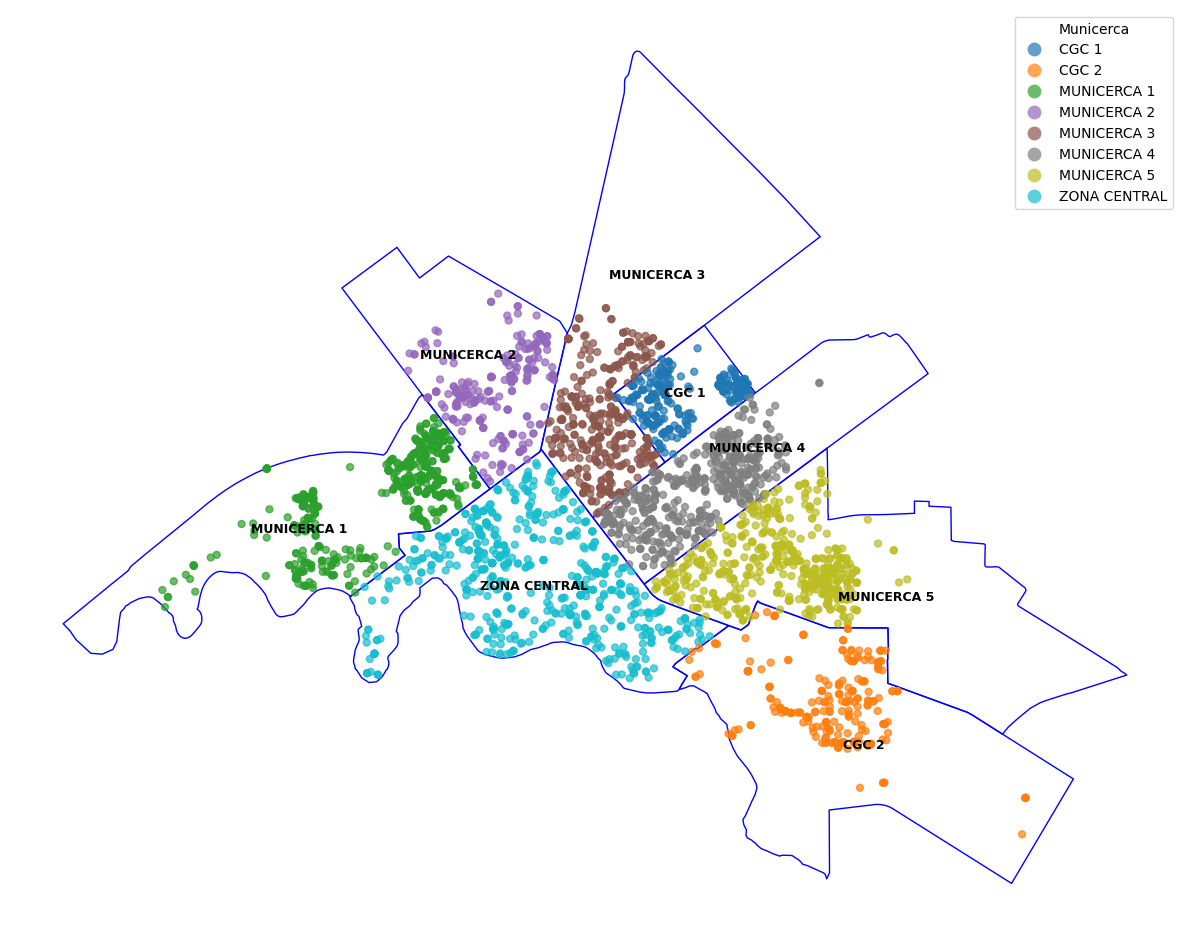

In [69]:
import geopandas as gpd
import matplotlib.pyplot as plt


import geopandas as gpd

# 1) Carga la capa de Municercas
gdf_municerca = gpd.read_file(r"Datos\infra y mov/Capa de Municercas/NuevaDistribucion2024.shp")

casos_proj = gdf_casos_utm.to_crs(gdf_municerca.crs)

casos_con_municerca = gpd.sjoin(
    casos_proj,
    gdf_municerca[['Nombre','geometry']],
    how='left',
    predicate='within'
).drop(columns=['index_right'])


# 2) Reproyecta tus casos al mismo CRS de Municercas
casos_proj = gdf_casos_utm.to_crs(gdf_municerca.crs)


casos_con_muni = (
    gpd.sjoin(
        casos_proj,
        gdf_municerca[['Nombre','geometry']],
        how='left',
        predicate='within'
    )
    .rename(columns={'Nombre':'municerca'})
    .drop(columns=['index_right'])
)

# 4) Inspecciona el resultado
print(casos_con_muni[['lon','lat','municerca']].head())

# 5) Grafica: polígonos + etiquetas + puntos coloreados por municerca
fig, ax = plt.subplots(figsize=(12, 10))

# 5a) Contornos
gdf_municerca.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1)

# 5b) Etiquetas en centroides
for _, row in gdf_municerca.iterrows():
    cx, cy = row.geometry.centroid.xy
    ax.text(cx[0], cy[0],
            row['Nombre'],
            ha='center', va='center',
            fontsize=9, fontweight='bold')

# 5c) Casos coloreados por municerca
casos_con_muni.plot(
    column='municerca',
    ax=ax,
    markersize=25,
    alpha=0.7,
    legend=True,
    legend_kwds={'title':'Municerca'}
)

# 6) Centrar y ajustar límites al bounding‐box de las municercas
minx, miny, maxx, maxy = gdf_municerca.total_bounds
dx, dy = (maxx-minx)*0.05, (maxy-miny)*0.05
ax.set_xlim(minx-dx, maxx+dx)
ax.set_ylim(miny-dy, maxy+dy)

ax.set_aspect('equal')
ax.set_axis_off()
plt.tight_layout()
plt.show()




In [70]:
gdf_municerca['geometry_centroid'] = gdf_municerca.geometry.centroid
gdf_municerca['lon_centroid'] = gdf_municerca.geometry_centroid.x
gdf_municerca['lat_centroid'] = gdf_municerca.geometry_centroid.y

gdf_municerca

import geopandas as gpd

gdf_municerca_geo = gdf_municerca.to_crs(epsg=4326)

gdf_municerca_geo['geometry_centroid'] = gdf_municerca_geo.geometry.centroid

gdf_municerca_geo['longitude'] = gdf_municerca_geo.geometry_centroid.x
gdf_municerca_geo['latitude'] = gdf_municerca_geo.geometry_centroid.y

df_centroids = gdf_municerca_geo[['Nombre','longitude','latitude']]
df_centroids.columns=["municerca",'longitude','latitude']

C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\1534926454.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_municerca_geo['geometry_centroid'] = gdf_municerca_geo.geometry.centroid


In [71]:
# 1) Abre la conexión
from pathlib import Path
import sqlite3
import pandas as pd
BASE_DIR = Path().resolve()  

DB_PATH = BASE_DIR.parent / "backend" / "data" / "mi_base_de_datos5.db"

conn = sqlite3.connect(DB_PATH)

# 2) Lée los últimos 20 registros (ordenados por fecha decreciente)
df_clima = pd.read_sql_query("""
    SELECT *
      FROM climate_data
     ORDER BY time
""", conn)

conn.close()
# df_clima["longitude"]=df_clima["longitude"]-0.25



df_clima=df_clima.rename(columns={'time':'date'})

In [72]:
df_clima2=df_clima.copy()
df_clima2["date"]=pd.to_datetime(df_clima2["date"])
df_clima2["dia"]=df_clima2["date"].dt.day
df_clima2["mes"]=df_clima2["date"].dt.month
clim_cols=["tp","t2m","d2m","t2m_min","t2m_max"]
prom_weather=pd.DataFrame(pd.pivot_table(df_clima2,index=["dia","mes"],values=clim_cols,aggfunc="mean").to_records())

df_clima2=pd.merge(df_clima2,prom_weather,on=["dia","mes"],how="left")
df_clima2.head()

,latitude,longitude,date,t2m_x,t2m_min_x,t2m_max_x,d2m_x,tp_x,dia,mes,d2m_y,t2m_y,t2m_max_y,t2m_min_y,tp_y
0,-32.5,-63.3,2021-01-01,24.486017,18.003967,31.188110,12.269324,0.000856,1,1,17.622424,25.5787,30.076625,20.566233,73.721846
1,-32.5,-63.2,2021-01-01,24.577490,17.906311,31.428345,11.904903,0.000856,1,1,17.622424,25.5787,30.076625,20.566233,73.721846
2,-32.5,-63.1,2021-01-01,24.456964,17.800842,31.307251,11.904090,0.000856,1,1,17.622424,25.5787,30.076625,20.566233,73.721846
3,-32.4,-63.3,2021-01-01,24.369562,17.873108,31.074829,12.312618,0.000856,1,1,17.622424,25.5787,30.076625,20.566233,73.721846
4,-32.4,-63.2,2021-01-01,24.249283,17.793030,30.951782,12.426063,0.000856,1,1,17.622424,25.5787,30.076625,20.566233,73.721846


In [73]:
clim_cols_anom=[]
for ss in clim_cols:
    df_clima2[ss+"_anom"]=df_clima2[ss+"_x"]-df_clima2[ss+"_y"]
    df_clima2=df_clima2.rename(columns={ss+"_x":ss})
    df_clima2.drop(ss+"_y",axis=1,inplace=True)
    clim_cols_anom.append(ss+"_anom")


df_clima2.head()

,latitude,longitude,date,t2m,t2m_min,t2m_max,d2m,tp,dia,mes,tp_anom,t2m_anom,d2m_anom,t2m_min_anom,t2m_max_anom
0,-32.5,-63.3,2021-01-01,24.486017,18.003967,31.188110,12.269324,0.000856,1,1,-73.720991,-1.092683,-5.353100,-2.562266,1.111485
1,-32.5,-63.2,2021-01-01,24.577490,17.906311,31.428345,11.904903,0.000856,1,1,-73.720991,-1.001211,-5.717521,-2.659922,1.351719
2,-32.5,-63.1,2021-01-01,24.456964,17.800842,31.307251,11.904090,0.000856,1,1,-73.720991,-1.121736,-5.718335,-2.765391,1.230626
3,-32.4,-63.3,2021-01-01,24.369562,17.873108,31.074829,12.312618,0.000856,1,1,-73.720991,-1.209138,-5.309806,-2.693125,0.998204
4,-32.4,-63.2,2021-01-01,24.249283,17.793030,30.951782,12.426063,0.000856,1,1,-73.720991,-1.329418,-5.196362,-2.773203,0.875157


In [74]:




import numpy as np
import pandas as pd
import geopandas as gpd

def centroids_from_shp(shp_path, name_col='Nombre'):
    gdf = gpd.read_file(shp_path).to_crs(epsg=4326)
    gdf['centroid'] = gdf.geometry.centroid
    out = gdf[[name_col, 'centroid']].copy()
    out['lat'] = out['centroid'].y
    out['lon'] = out['centroid'].x
    out = out.drop(columns='centroid').rename(columns={name_col:'municerca'})
    return out

def bilinear_interp_point(lat, lon, lat0, dlat, lon0, dlon, F):
    """
    Interpola en (lat,lon) a partir de malla regular:
      lat(i) = lat0 + i*dlat, lon(j) = lon0 + j*dlon
      F[i,j] es el valor en la grilla.
    Devuelve valor interpolado y los (i,j) usados.
    """
    # índices flotantes
    i_f = (lat - lat0)/dlat
    j_f = (lon - lon0)/dlon
    i0 = int(np.floor(i_f)); i1 = i0 + 1
    j0 = int(np.floor(j_f)); j1 = j0 + 1

    # pesos
    wi = i_f - i0    # fracción en lat
    wj = j_f - j0    # fracción en lon

    # contornos seguros
    if i0 < 0 or j0 < 0 or i1 >= F.shape[0] or j1 >= F.shape[1]:
        return np.nan

    f00 = F[i0, j0]; f01 = F[i0, j1]
    f10 = F[i1, j0]; f11 = F[i1, j1]
    # bilinear
    f0 = f00*(1-wj) + f01*wj
    f1 = f10*(1-wj) + f11*wj
    return f0*(1-wi) + f1*wi

def bilinear_for_dates(df_grid, df_centroids, var='t2m', date_col='fecha', lat_name='latitude', lon_name='longitude',
                       lat0=-90.0, dlat=0.5, lon0=-180.0, dlon=0.5):
    """
    df_grid: DataFrame con columnas [fecha, lat, lon, var]
             (lat/lon pegadas a la grilla 0.5°)
    df_centroids: DataFrame con [municerca, lat, lon] (centroides)
    Devuelve DataFrame con [municerca, fecha, var_bilinear]
    """
    out = []
    for fecha, df_d in df_grid.groupby(date_col):
        # pivot a matriz de la grilla para ese día
        # asumimos lat/lon exactos de la malla
        P = df_d.pivot(index=lat_name, columns=lon_name, values=var).sort_index(ascending=True)
        lats = P.index.to_numpy()
        lons = P.columns.to_numpy()
        # si conoces lat0/dlat/lon0/dlon exactos, puedes usarlos; si no, los infieres:
        lat0_i, dlat_i = lats.min(), np.diff(lats).mean()
        lon0_i, dlon_i = lons.min(), np.diff(lons).mean()
        F = P.to_numpy()

        for _, r in df_centroids.iterrows():
            v = bilinear_interp_point(r['lat'], r['lon'], lat0_i, dlat_i, lon0_i, dlon_i, F)
            out.append((r['municerca'], fecha, v))
    return pd.DataFrame(out, columns=['municerca', date_col, f'{var}_bilin'])


centros = centroids_from_shp("Datos/infra y mov/Capa de Municercas/NuevaDistribucion2024.shp",
                             name_col='Nombre')
# 2) df_grid: algo como [fecha, lat, lon, t2m]
# 3) interpolo
df_clima1=pd.DataFrame()
for c in clim_cols+clim_cols_anom:   # p.ej. ['t2m','d2m','tp','t2m_min','t2m_max','ws10']
    aux = bilinear_for_dates(
        df_grid=df_clima2, 
        df_centroids=centros,
        var=c,                      # <-- usa la variable correcta
        date_col='date',
        lat_name='latitude',
        lon_name='longitude'
    )
    # renombra de "{var}_bilin" -> "{var}" para no duplicar nombres raros
    aux = aux.rename(columns={f'{c}_bilin': c})

    if df_clima1.empty:
        df_clima1 = aux
    else:
        df_clima1 = df_clima1.merge(aux, on=['municerca','date'], how='outer')
df_clima1.sort_values(by=["date","municerca"])[:30]



C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\524586836.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


,municerca,date,tp,t2m,d2m,t2m_min,t2m_max,tp_anom,t2m_anom,d2m_anom,t2m_min_anom,t2m_max_anom
0,CGC 1,2021-01-01,0.000856,24.281326,12.392827,17.810455,30.987248,-73.720991,-1.297374,-5.229597,-2.755778,0.910623
1724,CGC 2,2021-01-01,0.000856,24.355744,12.265369,17.834365,31.101630,-73.720991,-1.222956,-5.357055,-2.731868,1.025005
3448,MUNICERCA 1,2021-01-01,0.000856,24.354297,12.326418,17.864059,31.062290,-73.720991,-1.224403,-5.296006,-2.702174,0.985665
5172,MUNICERCA 2,2021-01-01,0.000856,24.311450,12.358215,17.825566,31.021576,-73.720991,-1.267251,-5.264209,-2.740667,0.944950
6896,MUNICERCA 3,2021-01-01,0.000856,24.280643,12.383823,17.798267,30.994639,-73.720991,-1.298057,-5.238601,-2.767966,0.918013
8620,MUNICERCA 4,2021-01-01,0.000856,24.276717,12.397961,17.810243,30.981435,-73.720991,-1.301984,-5.224464,-2.755990,0.904809
10344,MUNICERCA 5,2021-01-01,0.000856,24.306759,12.338918,17.815054,31.032755,-73.720991,-1.271941,-5.283507,-2.751179,0.956129
12068,ZONA CENTRAL,2021-01-01,0.000856,24.339834,12.327856,17.848370,31.055633,-73.720991,-1.238867,-5.294569,-2.717863,0.979007
1,CGC 1,2021-01-02,0.000000,26.181883,13.211276,20.797035,32.194953,-5.267439,-0.388550,-2.586080,0.796972,-0.601908
1725,CGC 2,2021-01-02,0.000000,26.265273,13.106814,20.812789,32.325755,-5.267439,-0.305160,-2.690541,0.812726,-0.471106


In [75]:
df_clima_=df_clima1.copy()
df_clima_=df_clima_.rename(columns={'date':'fecha_picadura_estimada'})

In [101]:
casos_con_muni2=pd.merge(casos_con_muni,df_clima_,on=["municerca","fecha_picadura_estimada"],how="left")

cols=list(casos_con_muni2.columns)


cols.remove("municerca")
casos_con_muni2=casos_con_muni2[["municerca"]+cols]

In [102]:
# df_clima2["date"]=df_clima2["date"].astype(str)
# casos_con_muni2["fecha_picadura_estimada"]=casos_con_muni2["fecha_picadura_estimada"].astype(str)
# for c in ["longitude","latitude"]:
#     casos_con_muni2[c]=casos_con_muni2[c].astype(float)
#     df_clima2[c]=df_clima2[c].astype(float)
    
# df_casos_d=pd.merge(casos_con_muni2,df_clima2,left_on=["fecha_picadura_estimada","longitude","latitude"],right_on=["date","longitude","latitude"],how="left")

# df_casos_d["fecha_picadura_estimada"] = pd.to_datetime(df_casos_d["fecha_picadura_estimada"], format="%Y-%m-%d", errors="coerce")

# # 1) Mes numérico (1–12)
# df_casos_d["mes"] = df_casos_d["fecha_picadura_estimada"].dt.month


# df_casos_d.head()

In [103]:

casos_con_muni2 = casos_con_muni2.sort_values('fecha_picadura_estimada')
casos_con_muni2['fecha'] = pd.to_datetime(casos_con_muni2['fecha_picadura_estimada'])

def add_bucket(df, date_agrup: str):
    df = df.copy()

    if not pd.api.types.is_datetime64_any_dtype(df['fecha']):
        df['fecha'] = pd.to_datetime(df['fecha'])

    if date_agrup in ('7D', 'W', 'semanal'):  # semanal anclada a lunes
        start = df['fecha'].dt.to_period('W-MON').dt.to_timestamp(how='start')
        df['fecha_agg'] = start.dt.strftime('%Y-%m-%d')

    elif date_agrup in ('1D', 'D', 'diario'):  # semanal anclada a lunes

        df['fecha_agg'] = df['fecha'].astype(str)


    elif date_agrup in ('14D','2W'):
        anchor = df['fecha'].min().normalize()
        # ancla -> floor de 14 días -> vuelve a fechas reales
        start = (df['fecha'] - anchor).dt.floor('14D') + anchor
        df['fecha_agg'] = start.dt.strftime('%Y-%m-%d')  # etiqueta con el inicio del bin
    elif date_agrup in ('MS','M','mensual'):
        df['fecha_agg'] = df['fecha'].dt.to_period('M').astype(str)
    else:
        # genérico: intenta usar alias de pandas (ej. '14D','2W','QS','Q', etc.)
        df['fecha_agg'] = df['fecha'].dt.to_period(date_agrup).astype(str)
    return df



def agrup_datos(casos_con_muni2,grilla,date_agrup,target):


    sacar = ["DIRECCION",'ideventocaso',"WKT","geometry","fecha_picadura_estimada",'date','fecha_agg','fecha','fecha_apertura']

    bset = set(sacar)                     # para membership O(1)
    res = [x for x in cols if x not in bset]

    casos_con_muni2['sexo'] = casos_con_muni2['sexo'].replace({'M': 1, 'F': 0})
    casos_con_muni2.loc[:, res] = casos_con_muni2.loc[:, res].astype("float64")

    casos_con_muni2 = add_bucket(casos_con_muni2, date_agrup)


    if grilla=="MUN":
        l_agrupacion=["municerca","fecha_agg"]    
        # prep columnas y codificación
    else:
        l_agrupacion=["fecha_agg"]
    casos_con_muni2 = casos_con_muni2[cols+l_agrupacion].copy()
    # agregados: medias + conteo de casos
    g = casos_con_muni2.groupby(l_agrupacion)


    means = g[res].mean().reset_index()
    counts = g.size().rename('casos').reset_index()

    casos_agg = means.merge(counts, on=l_agrupacion).sort_values(l_agrupacion)


    # df_full3=casos_agg.loc[(casos_agg["latitude"]<-31.2)&(casos_agg["longitude"]>-63.4)]
    df_mundosano=pd.read_excel(r"Datos\Indicadores sociodemograficos\Indicadores_MundoSano.xlsx")
    df_mundosano["municerca"]=df_mundosano["municerca"].str.upper()

    if grilla=="MUN":

        

        casos_muni_ms=pd.merge(casos_agg,df_mundosano,on=["municerca"],how="left")
        if target=="INC":
            casos_muni_ms['casos_#']=casos_muni_ms['casos'].copy()
            
            casos_muni_ms['casos']=(casos_muni_ms['casos_#']/casos_muni_ms['Estimación poblacional'])*10000
  
    else:

        if target=="INC":
            casos_agg['casos_#']=casos_agg['casos'].copy()
            total_pob=df_mundosano['Estimación poblacional'].sum()
            casos_agg['casos']=(casos_agg['casos_#']/total_pob)*10000
        casos_muni_ms=casos_agg.copy()

    return(casos_muni_ms)




In [ ]:
# ---------- 1) Features base ----------
def add_case_windows(df):
    df = df.sort_values(['municerca','fecha_agg']).copy()
    # sumas 2,3,4 semanas previas, sin fuga
    for n in (2,3,4):
        df[f'casos_sum_{n}w'] = (df.groupby('municerca')['casos']
                                   .transform(lambda s: s.shift(1).rolling(n, min_periods=n).sum()))
    # lags
    for lag in (1,2,3,4):
        df[f'casos_lag_{lag}'] = df.groupby('municerca')['casos'].shift(lag)
    # media móvil 4w sin fuga
    df['casos_ma_4'] = (df.groupby('municerca')['casos']
                          .transform(lambda s: s.shift(1).rolling(4, min_periods=4).mean()))
    # mes desde ISO week
    # df['mes'] = pd.to_datetime(df['fecha_agg'] + "-1", format="%G-W%V-%u").dt.month
    return df

import re

def add_climate_rolls(
    df,
    clim_prefixes=('t2m','d2m','tp','t2m_min','t2m_max'),
    wins=(1,2),
    sum_prefixes=('tp',),              # prefijos que además llevan rolling SUM
):
    """
    Crea rolling means (y opcionalmente sums) para TODA columna cuyo nombre
    empiece por alguno de los prefijos indicados. Evita columnas ya agregadas.
    """
    df = df.sort_values(['municerca','fecha_agg']).copy()
    created = []

    # patrón para excluir columnas ya agregadas (p.ej. t2m_mean_1w, tp_sum_2w)
    _already_agg = re.compile(r'_(mean|sum)_[0-9]+w$')

    # columnas candidata: empiezan con alguno de los prefijos y NO son ya agregadas
    base_cols = [c for c in df.columns
                 if any(c.startswith(p) for p in clim_prefixes)
                 and not _already_agg.search(c)]

    # genera rolling features por grupo (municerca), con shift(1) para no fugar
    for col in base_cols:
        for w in wins:
            mcol = f'{col}_mean_{w}w'
            df[mcol] = (df.groupby('municerca')[col]
                          .transform(lambda s: s.shift(1).rolling(w, min_periods=w).mean()))
            created.append(mcol)

            # si el prefijo de la columna está en sum_prefixes -> también SUM
            if any(col.startswith(p) for p in sum_prefixes):
                scol = f'{col}_sum_{w}w'
                df[scol] = (df.groupby('municerca')[col]
                              .transform(lambda s: s.shift(1).rolling(w, min_periods=w).sum()))
                created.append(scol)

    return df, created


def enforce_unique_time(df, keys=('municerca','fecha_agg')):
    df = df.copy()
    # quick debug: ver duplicados
    dup = df.duplicated(list(keys), keep=False)
    if dup.any():
        # Agrega por keys: numéricas -> mean (o sum si corresponde), no numéricas -> first
        num_cols = df.select_dtypes(include='number').columns.difference(keys)
        agg = {c: 'mean' for c in num_cols}
        # si preferís SUM para 'casos' y acumulados, cámbialo aquí:
        for c in [c for c in num_cols if c.startswith(('casos','vec_','t2','t_min','t_max','wind','tp','d2m'))]:
            agg[c] = 'mean'  # o 'sum' si tu definición lo requiere

        keep_first = [c for c in df.columns if c not in num_cols and c not in keys]
        for c in keep_first: agg[c] = 'first'

        df = (df.groupby(list(keys), as_index=False)
                .agg(agg)
                .sort_values(list(keys)))
    return df

# ---------- 2) Matriz de vecinos y feature vecinal ----------
def build_adjacency(shp_path, name_col='Nombre'):
    gdf = gpd.read_file(shp_path).to_crs(epsg=4326)
    gdf['geometry'] = gdf.geometry.buffer(0)  # sanea
    nbrs = gpd.sjoin(gdf[[name_col,'geometry']], gdf[[name_col,'geometry']], how="inner", predicate="intersects")
    nbrs = nbrs.query(f"{name_col}_left != {name_col}_right")
    adj = pd.crosstab(nbrs[f'{name_col}_left'], nbrs[f'{name_col}_right']).astype(int)
    zonas = gdf[name_col].tolist()
    adj = adj.reindex(index=zonas, columns=zonas, fill_value=0)
    adj.index.name = adj.columns.name = 'municerca'
    return adj.rename_axis(index='municerca', columns='municerca')

def neighbor_feature(df, adj, base_col='casos_sum_3w'):
    # Si no hay vecinos (una sola zona), devuelve columna en 0
    if df['municerca'].nunique() <= 1:
        out = df.copy()
        out['Vecinos_total'] = 0.0
        return out

    # --- prepara serie base (lag sin fuga) y colapsa duplicados ---
    tmp = (df.sort_values(['municerca','fecha_agg'])
             .loc[:, ['municerca','fecha_agg', base_col]]
             .dropna(subset=[base_col]))

    # lag t-1 del base_col dentro de cada zona
    tmp[base_col + '_lag1'] = (tmp.groupby('municerca')[base_col]
                                  .shift(1))

    # colapsa a UNA fila por (fecha_agg, municerca) para el pivot
    tmp = (tmp.groupby(['fecha_agg','municerca'], as_index=False)
              .agg({base_col + '_lag1': 'first'}))

    # --- pivot tolerante (si aún hubiera duplicados, toma el primero) ---
    P = (tmp.pivot_table(index='fecha_agg', columns='municerca',
                         values=base_col + '_lag1', aggfunc='first')
           .reindex(columns=adj.index)  # alinea orden de zonas
           .fillna(0.0))

    # re-alinea adyacencia
    A = adj.reindex(index=P.columns, columns=P.columns, fill_value=0)

    # suma vecinal = P · A^T
    NV = P.values @ A.T
    nv = (pd.DataFrame(NV, index=P.index, columns=P.columns)
            .stack().rename('Vecinos_total').reset_index()
            .rename(columns={'level_1': 'municerca'}))

    # merge back
    out = df.merge(nv, on=['fecha_agg','municerca'], how='left')
    return out

def neighbor_lag_features(df, adj, base_col='casos',
                          lags=(1,2,3), sums=(2,3),
                          prefix='vec'):
    """
    Crea features vecinales:
      - {prefix}_lagL  = suma en vecinos del 'base_col' con lag L
      - {prefix}_sum_w = suma en vecinos del 'base_col' acumulada w semanas (shift(1) sin fuga)
    Requiere df con ['municerca','fecha_agg', base_col] y 'adj' con índices/columnas = nombres de municerca.
    """
    if df['municerca'].nunique() <= 1:
        # sin vecinos: devuelve columnas en cero
        out = df.copy()
        for L in lags:
            out[f'{prefix}_lag{L}'] = 0.0
        for w in sums:
            out[f'{prefix}_sum_{w}w'] = 0.0
        return out

    tmp = df.sort_values(['municerca','fecha_agg']).copy()

    # 1) matriz semanas x zonas del base_col
    P = (tmp.pivot(index='fecha_agg', columns='municerca', values=base_col)
           .reindex(columns=adj.index)  # alinea el orden de zonas
           .fillna(0.0))

    # 2) Alinea adyacencia a columnas de P
    A = adj.reindex(index=P.columns, columns=P.columns, fill_value=0)

    # 3) Lags vecinales: (P.shift(L)) @ A^T
    vec_dfs = []
    for L in lags:
        NV = P.shift(L).dot(A.T)  # semanas x zonas
        s = (NV.stack().rename(f'{prefix}_lag{L}')
               .rename_axis(index=['fecha_agg','municerca'])
               .reset_index())
        vec_dfs.append(s)

    # 4) Acumulados vecinales w: (P.shift(1).rolling(w).sum()) @ A^T (sin fuga)
    R = P.shift(1)  # t-1
    for w in sums:
        S = R.rolling(w, min_periods=w).sum()
        NV = S.dot(A.T)
        s = (NV.stack().rename(f'{prefix}_sum_{w}w')
               .rename_axis(index=['fecha_agg','municerca'])
               .reset_index())
        vec_dfs.append(s)

    # 5) merge al df original
    out = df.merge(pd.concat(vec_dfs, ignore_index=True),
                   on=['fecha_agg','municerca'], how='left')
    return out

def neighbor_lag_features(df, adj, base_col='casos',
                          lags=(1,2,3,4), sums=(2,3,4),
                          prefix='vec'):
    if df['municerca'].nunique() <= 1:
        out = df.copy()
        for L in lags: out[f'{prefix}_lag{L}'] = 0.0
        for w in sums: out[f'{prefix}_sum_{w}w'] = 0.0
        return out

    tmp = df.sort_values(['municerca','fecha_agg']).copy()

    # matriz semanas x zonas del base_col
    P = (tmp.pivot(index='fecha_agg', columns='municerca', values=base_col)
           .reindex(columns=adj.index)
           .fillna(0.0))
    A = adj.reindex(index=P.columns, columns=P.columns, fill_value=0)

    # helper para convertir matriz -> serie indexada por (fecha_agg, municerca)
    def _stack(M, name):
        return (pd.DataFrame(M, index=P.index, columns=P.columns)
                  .stack().rename(name))

    series = []

    # lags vecinales: (P.shift(L)) @ A^T
    for L in lags:
        NV = P.shift(L).dot(A.T)
        series.append(_stack(NV, f'{prefix}_lag{L}'))

    # acumulados vecinales sin fuga: (P.shift(1).rolling(w).sum()) @ A^T
    R = P.shift(1)
    for w in sums:
        NV = R.rolling(w, min_periods=w).sum().dot(A.T)
        series.append(_stack(NV, f'{prefix}_sum_{w}w'))

    # DataFrame ancho (1 fila por clave)
    V = pd.concat(series, axis=1).reset_index()  # columnas: fecha_agg, municerca, vec_*

    # merge seguro (sin duplicar)
    out = df.merge(V, on=['fecha_agg','municerca'], how='left')
    return out
# ---------- 3) Construcción dataset ----------
def build_dataset(df_raw, grilla, shp_path):
    df = df_raw.copy()
    # NVDI ffill por grupo (no global)

    df = enforce_unique_time(df, keys=('municerca','fecha_agg'))

    df = df.sort_values(['municerca','fecha_agg'])
    # df['NVDI'] = df.groupby('municerca')['NVDI'].ffill()
    # ventanas de casos y clima
    df = add_case_windows(df)
    df, clima_cols = add_climate_rolls(df)


    df.loc[:, clima_cols] = df.loc[:, clima_cols].bfill()
    
    

    adj = None
    if grilla == "MUN":
        adj = build_adjacency(shp_path, name_col='Nombre')

        # 1) lags/rollings vecinales basados en 'casos'
        df = neighbor_lag_features(df, adj, base_col='casos',
                                   lags=(1,2,3), sums=(2,3), prefix='vec')

        # 2) (opcional) tu feature previa "Vecinos_total" con sum_3w
        #    si quieres mantener el nombre:
        df = neighbor_feature(df, adj, base_col='casos_sum_3w')
        # o, si prefieres unificar:
        df['Vecinos_total'] = df['vec_sum_3w']

        return df, clima_cols, adj
    else:
        # Sin adyacencia (ej. VM con una sola serie): rellena vecinales en cero
        df['Vecinos_total'] = 0.0
        for L in (1,2,3,4):
            df[f'vec_lag{L}'] = 0.0
        for w in (2,3,4):
            df[f'vec_sum_{w}w'] = 0.0
        return df, clima_cols, ""


def proc_datos(casos_con_muni2,grilla,date_agrup,target):

    casos_muni_ms=agrup_datos(casos_con_muni2,grilla,date_agrup,target)
    casos_muni_ms_=casos_muni_ms.copy()
    if grilla=="VM":
        casos_muni_ms_['municerca'] = 'Villa María (total)'

    df_datos_agg, clima_cols, adj = build_dataset(
        casos_muni_ms_,
        grilla,
        shp_path=r"Datos/infra y mov/Capa de Municercas/NuevaDistribucion2024.shp"
        
    )
    df_datos_agg.to_csv(r"outputs\casos_con_municerca"+grilla+"_"+date_agrup+"_"+target+".csv", index=False)


    df_datos_agg.head()
    return(df_datos_agg)


In [105]:

# import ee
# import geemap
# import geopandas as gpd
# import pandas as pd
# from datetime import date
# from dateutil.relativedelta import relativedelta

# service_account = 'nainho@probando-273503.iam.gserviceaccount.com'
# key_path = r'cache\probando-273503-ecb7bf804a85.json'

# # Crea credenciales de servicio y pega a EE
# credentials = ee.ServiceAccountCredentials(service_account, key_path)
# ee.Initialize(credentials=credentials)

# # --- 0) Inicializa Earth Engine ---

# # --- 1) Carga y reproyecta polígonos ---
# gdf = gpd.read_file(r"Datos/infra y mov/Capa de Municercas/NuevaDistribucion2024.shp")
# gdf = gdf.to_crs("EPSG:4326")
# fc  = geemap.geopandas_to_ee(gdf, geodesic=False)

# # --- 2) Genera lista de inicios de mes desde 2023-01-01 hasta hoy (2025-07-17) ---

# import sqlite3


# # Conectar y obtener la fecha máxima
# conn = sqlite3.connect(DB_PATH)
# cursor = conn.cursor()

# cursor.execute("SELECT MAX(year_week) FROM nvdi_data_")
# row = cursor.fetchone()
# conn.close()

# # Fecha máxima registrada
# last_period = row[0]  # puede ser None si la tabla está vacía


# from datetime import datetime

# if last_period:
#     # Convertir de "YYYY-Www" a datetime (lunes de esa semana ISO)
#     start_date = datetime.strptime(last_period + '-1', "%G-W%V-%w").date() + relativedelta(weeks=1)
# else:
#     # Si no hay datos, empezar desde 2023-01-01
#     start_date = date(2023, 1, 1)


# print(last_period,start_date)

# end_date = date.today()
# months     = []

# from datetime import timedelta
# results = []
# current = start_date
# end_date = date.today()


# while current <= end_date:
#     week_start = current
#     week_end = current + timedelta(days=6)

#     ee_week_start = ee.Date(week_start.strftime('%Y-%m-%d'))
#     ee_week_end = ee.Date((week_end + timedelta(days=1)).strftime('%Y-%m-%d'))  # include end day

#     # Colección semanal
#     coll = (ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
#             .filterDate(ee_week_start, ee_week_end)
#             .filterBounds(fc)
#             .map(lambda img: img.multiply(0.0000275).add(-0.2))
#             .map(lambda img: img.normalizedDifference(['SR_B5', 'SR_B4']).rename('NDVI')))

#     if coll.size().getInfo() == 0:
#         print(f"❌ Sin imágenes en la semana: {week_start} a {week_end}")
#         current += timedelta(weeks=1)
#         continue

#     print(f"✅ Procesando semana: {week_start} a {week_end} ({coll.size().getInfo()} imágenes)")

#     mean_img = coll.mean()

#     stats = mean_img.reduceRegions(
#         collection=fc,
#         reducer=ee.Reducer.mean(),
#         scale=30
#     ).getInfo()['features']

#     for feat in stats:
#         props = feat['properties']
#         ndvi_val = props.get('mean', None)

#         if ndvi_val is not None:
#             results.append({
#                 'municerca': props['Nombre'],
#                 'month': pd.to_datetime(week_start).strftime('%G-W%V'),
#                 'ndvi': ndvi_val
#             })

#     current += timedelta(weeks=1)

# df = pd.DataFrame(results)

# def agregar_db(datos):
#     conn = sqlite3.connect(DB_PATH)
#     cursor = conn.cursor()

# # Crear la tabla si no existe
#     cursor.execute('''
#         CREATE TABLE IF NOT EXISTS nvdi_data_ (
#             municerca TEXT NOT NULL,
#             year_week TEXT NOT NULL,
#             NVDI REAL,
#             PRIMARY KEY (municerca, year_week)
#         )
#     ''')

#     # Insertar o actualizar los datos
#     for _, row in datos.iterrows():
#         cursor.execute('''
#             INSERT INTO nvdi_data_ (municerca, year_week, NVDI)
#             VALUES (?, ?, ?)
#             ON CONFLICT(municerca, year_week) DO UPDATE SET
#             NVDI=excluded.NVDI
#         ''', (row['municerca'], row['year_week'], row['NVDI']))

#     # Confirmar y cerrar
#     conn.commit()
#     conn.close()


# conn = sqlite3.connect(DB_PATH)

# # 2) Lée los últimos 20 registros (ordenados por fecha decreciente)
# df_nvdi = pd.read_sql_query("""
#     SELECT *
#       FROM nvdi_data_ 
# """, conn)
# conn.close()

# if len(df)>0:
#     df_pivot = df.pivot(index='municerca', columns='month', values='ndvi')
#     df_muni_muni=pd.DataFrame(df_pivot.to_records())
#     nvdi_muni=pd.melt(df_muni_muni,id_vars="municerca",var_name="year_week",value_name="NVDI")
    
#     df_nvdi2=pd.concat([df_nvdi,nvdi_muni]).drop_duplicates()

# else:
#     df_nvdi2=df_nvdi.copy()
# casos_muni_ms2=pd.merge(casos_muni_ms,df_nvdi2,on=["municerca","year_week"],how="left")

# casos_muni_ms2["NVDI"]=casos_muni_ms2["NVDI"].ffill().bfill()

# casos_muni_ms2.tail()

In [106]:


# === usar ===
# grilla = 'VM'        # Ciudad de villa maría
# grilla = 'MUN'       # municerca
# grilla = '1KM' o '2KM'        # Cuadrados de X KM por X KM

grilla="MUN"
grillas=["MUN"]
# === usar ===
# date_agrup = '7D'        # semanal (ISO)
# date_agrup = '15D'       # quincenal (1–15 / 16–fin)
# date_agrup = 'MS'        # mensual

dates_agrup=["7D","14D","MS"]
date_agrup="14D"

targets=["COUNT","INC"]
for t in targets:
    for g in grillas:
        for d in dates_agrup:
            print(f'funcionando con {g}, {d} y Target {t}')
            df_datos_agg=proc_datos(casos_con_muni2,g,d,t)


funcionando con MUN, 7D y Target COUNT


C:\Users\Nainh\AppData\Local\Temp\ipykernel_13644\4035910526.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  casos_con_muni2['sexo'] = casos_con_muni2['sexo'].replace({'M': 1, 'F': 0})


funcionando con MUN, 14D y Target COUNT
funcionando con MUN, MS y Target COUNT
funcionando con MUN, 7D y Target INC
funcionando con MUN, 14D y Target INC
funcionando con MUN, MS y Target INC


In [108]:
df_datos_agg

,municerca,fecha_agg,sexo,edad_diagnostico,lon,lat,distancia_rio,distancia_verde_m,distancia_grande_m,tp,t2m,d2m,t2m_min,t2m_max,tp_anom,t2m_anom,d2m_anom,t2m_min_anom,t2m_max_anom,casos,Estimación poblacional,Superficie (Km cuadrados),Proximidad al río (m) (distancia mínima),Proximidad al río (m) (distancia al centroide),Proximidad al río (m) (distancia máxima),Densidad poblacional,CALMAT I,CALMAT II,CALMAT III,CALMAT IV,CALMAT V,Hogares Pobres,Hogares Pobres No Indigentes,Hogares Indigentes,Personas Pobres,Personas Pobres No Indigentes,Personas Indigentes,UNEA: Sin Instrucción,UNEA: Primario Incompleto,UNEA: Primario Completo,UNEA: Secundario Incompleto,UNEA: Secundario Completo,UNEA: Superior y/o Universitario Incompleto,UNEA: Superior y/o Universitario Completo,Acceso a Cloacas,Acceso a Gas de Red,Acceso a Agua de Red,Acceso a Electricidad,Mujeres (%),Varones (%),Mujeres de 0 a 6 años,Varones de 0 a 6 años,Personas de 0 a 6 años,Mujeres de 7 a 14 años,Varones de 7 a 14 años,Personas de 7 a 14 años,Mujeres de 15 a 24 años,Varones de 15 a 24 años,Personas de 15 a 24 años,Mujeres de 25 a 59 años,Varones de 25 a 59 años,Personas de 25 a 59 años,Mujeres de 60 años o más,Varones de 60 años o más,Personas de 60 años o más,casos_#,casos_sum_2w,casos_sum_3w,casos_sum_4w,casos_lag_1,casos_lag_2,casos_lag_3,casos_lag_4,casos_ma_4,tp_mean_1w,tp_sum_1w,tp_mean_2w,tp_sum_2w,t2m_mean_1w,t2m_mean_2w,d2m_mean_1w,d2m_mean_2w,t2m_min_mean_1w,t2m_min_mean_2w,t2m_max_mean_1w,t2m_max_mean_2w,tp_anom_mean_1w,tp_anom_sum_1w,tp_anom_mean_2w,tp_anom_sum_2w,t2m_anom_mean_1w,t2m_anom_mean_2w,d2m_anom_mean_1w,d2m_anom_mean_2w,t2m_min_anom_mean_1w,t2m_min_anom_mean_2w,t2m_max_anom_mean_1w,t2m_max_anom_mean_2w,vec_lag1,vec_lag2,vec_lag3,vec_sum_2w,vec_sum_3w,Vecinos_total
0,CGC 1,2024-01,1.000000,41.500000,-63.230315,-32.396008,3059.782386,473.735893,2347.640469,0.013979,24.158700,15.558415,18.441834,29.686772,-7.305716,-2.934996,-2.818391,-3.262496,-2.760869,4.608295,4340,120.237673,2357.74,3151.33,3942.54,36.095176,81.82,15.15,3.03,0,0,30.30,27.27,3.03,32.93,29.27,3.66,4.62,20.00,20.0,20.00,26.15,3.08,6.15,93.94,78.79,100.0,100.00,43.21,56.79,1.23,2.47,3.70,1.23,4.94,6.17,6.17,12.35,18.52,18.52,22.23,40.75,16.05,14.81,30.86,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013979,0.013979,28.068922,56.137845,24.158700,24.854310,15.558415,17.645380,18.441834,19.969594,29.686772,30.220892,-7.305716,-7.305716,-0.901589,-1.803178,-2.934996,-1.122510,-2.818391,-0.506209,-3.262496,-1.007302,-2.760869,-1.095879,2.723295,NaN,NaN,NaN,NaN,NaN
1,CGC 1,2024-02,0.416667,30.166667,-63.230487,-32.395832,3078.608695,416.170671,2338.942231,56.123866,25.549921,19.732346,21.497355,30.755013,5.502538,0.689976,1.805973,1.247891,0.569110,27.649770,4340,120.237673,2357.74,3151.33,3942.54,36.095176,81.82,15.15,3.03,0,0,30.30,27.27,3.03,32.93,29.27,3.66,4.62,20.00,20.0,20.00,26.15,3.08,6.15,93.94,78.79,100.0,100.00,43.21,56.79,1.23,2.47,3.70,1.23,4.94,6.17,6.17,12.35,18.52,18.52,22.23,40.75,16.05,14.81,30.86,12,NaN,NaN,NaN,4.608295,NaN,NaN,NaN,NaN,0.013979,0.013979,28.068922,56.137845,24.158700,24.854310,15.558415,17.645380,18.441834,19.969594,29.686772,30.220892,-7.305716,-7.305716,-0.901589,-1.803178,-2.934996,-1.122510,-2.818391,-0.506209,-3.262496,-1.007302,-2.760869,-1.095879,27.256383,2.723295,NaN,29.979678,NaN,NaN
2,CGC 1,2024-03,0.466667,35.019048,-63.227872,-32.396480,3097.741207,368.825131,2518.722833,33.480802,23.233021,17.418674,19.319533,27.988713,-6.460683,1.906643,2.596505,2.013568,2.033720,241.935484,4340,120.237673,2357.74,3151.33,3942.54,36.095176,81.82,15.15,3.03,0,0,30.30,27.27,3.03,32.93,29.27,3.66,4.62,20.00,20.0,20.00,26.15,3.08,6.15,93.94,78.79,100.0,100.00,43.21,56.79,1.23,2.47,3.70,1.23,4.94,6.17,6.17,12.35,18.52,18.52,22.23,40.75,16.05,14.81,30.86,105,32.258065,NaN,NaN,27.649770,4.608295,NaN,NaN,NaN,56.123866,56.123866,28.068922,56.137845,25.549921,24.854310,19.732346,17.645380,21.497355,19.969594,30.755013,30.220892,5.502538,5.502538,-0.901589,-1.803178,0.689976